In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Data** **Overview**

In [ ]:
df = pd.read_csv('student_feedback.csv')
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


### **Dataset Structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


## **Average** **Scores** **for** **Survey** **Questions**

In [ ]:
avg_scores = df.drop(columns=['Student ID']).mean().sort_values(ascending=False)
avg_scores

,0
Unnamed: 0,500.000000
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


##**Top 5 Rated Survey Questions**

In [ ]:
top_questions = avg_scores.head(5)
top_questions


,0
Unnamed: 0,500.000000
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338


In [ ]:
colors = ['pink', 'blue', 'green', 'orange', 'purple']

##**Visualization: Top 5 Rated Survey Questions**

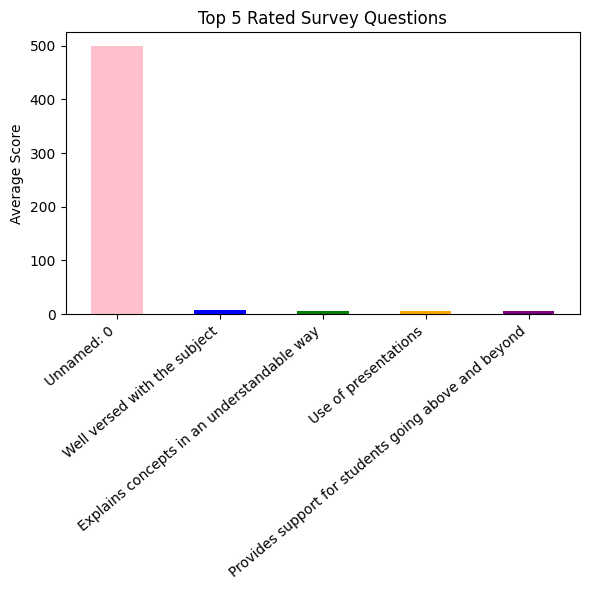

In [ ]:
plt.figure(figsize=(6,6))
top_questions.plot(kind='bar',color = colors)
plt.title('Top 5 Rated Survey Questions')
plt.ylabel('Average Score')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

### **Visualization: Rating Distribution**

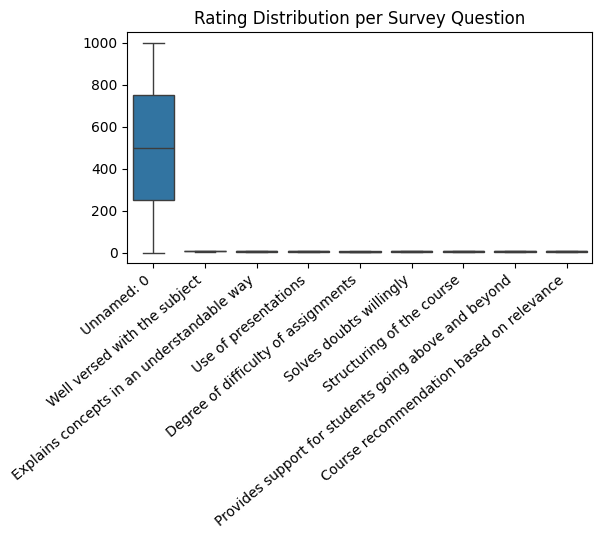

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df.drop(columns=['Student ID']))
plt.xticks(rotation=40, ha='right')
plt.title('Rating Distribution per Survey Question')
plt.show()

### **Synthetic Feedback Column**

In [ ]:
# Create synthetic textual feedback based on course recommendation rating
def create_feedback(score):
    if score >= 4:
        return "Very good course, learned a lot"
    elif score == 3:
        return "Average course, could be better"
    else:
        return "Needs improvement, not satisfied"

# Use the 'Course recommendation based on relevance' column to generate feedback
df['Feedback'] = df['Course recommendation based on relevance'].apply(create_feedback)
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Feedback,Sentiment,Sentiment_Label
0,0,340,5,2,7,6,9,2,1,8,"Very good course, learned a lot",0.91,Positive
1,1,253,6,5,8,6,2,1,2,9,"Very good course, learned a lot",0.91,Positive
2,2,680,7,7,6,5,4,2,3,1,"Needs improvement, not satisfied",-0.25,Negative
3,3,806,9,6,7,1,5,9,4,6,"Very good course, learned a lot",0.91,Positive
4,4,632,8,10,8,4,6,6,9,9,"Very good course, learned a lot",0.91,Positive


### **Sentiment analysis of Student Feedback**

In [ ]:
from textblob import TextBlob

# Function to get polarity score
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Create polarity column
df['Sentiment'] = df['Feedback'].apply(get_sentiment)

# Convert polarity to label
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment'].apply(sentiment_label)

# Check results
df[['Feedback','Sentiment','Sentiment_Label']].head()

,Feedback,Sentiment,Sentiment_Label
0,"Very good course, learned a lot",0.91,Positive
1,"Very good course, learned a lot",0.91,Positive
2,"Needs improvement, not satisfied",-0.25,Negative
3,"Very good course, learned a lot",0.91,Positive
4,"Very good course, learned a lot",0.91,Positive


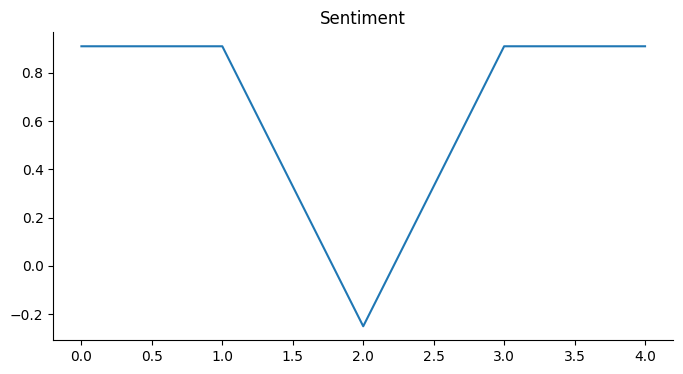

In [ ]:
from matplotlib import pyplot as plt
_df_3['Sentiment'].plot(kind='line', figsize=(8, 4), title='Sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

### **Sentiment Distribution**

/tmp/ipython-input-3685185569.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Sentiment_Label', data=df, palette=custom_colors, hue='Sentiment_Label', legend = False)


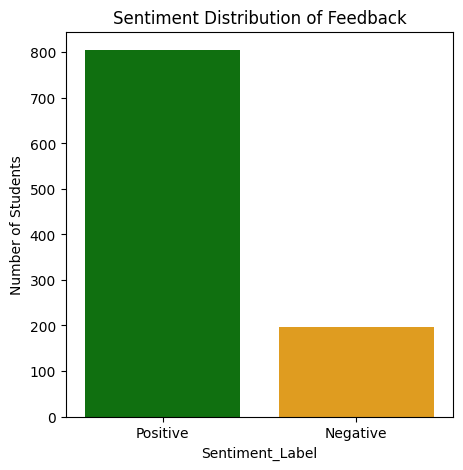

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
custom_colors=['green', 'orange', 'red']
sns.countplot(x='Sentiment_Label', data=df, palette=custom_colors, hue='Sentiment_Label', legend = False)
plt.title('Sentiment Distribution of Feedback')
plt.ylabel('Number of Students')
plt.show()

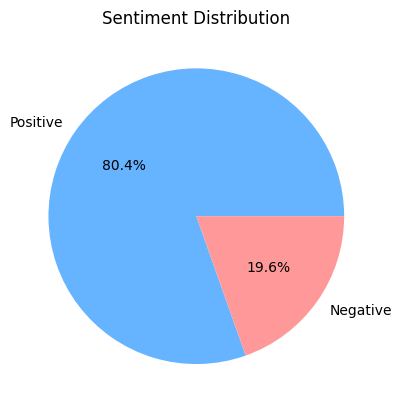

In [ ]:
df['Sentiment_Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

### **Key Insights**

- The highest-rated aspects of the course are subject knowledge and clarity in explanations, showing strong teaching effectiveness.  
- The top 5 survey questions indicate areas where students are most satisfied, including presentation use and assignment support.  
- Sentiment analysis shows that the majority of student feedback is Positive, confirming overall satisfaction.  
- Negative and neutral feedback highlights areas for improvement, such as assignment difficulty or course structuring.  
- Overall, the course receives generally positive feedback, but targeted improvements in specific areas can enhance student experience further.